In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Data Mining project/brain-tumor-mri-dataset/Dataset/

/content/drive/MyDrive/Data Mining project/brain-tumor-mri-dataset/Dataset


## **Phase 1: Dataset Selection and Preprocessing**

In this phase, I've added functions train_df and test_df to handle dataset loading. These functions are crucial for preprocessing, as they facilitate loading images and their corresponding labels from directories. However, preprocessing encompasses more than just loading data; it also involves tasks such as resizing images, normalizing pixel values, and splitting the dataset. While the code for splitting the dataset is partially implemented, we need to refine it and incorporate normalization steps.

In [4]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Function to load dataset and create DataFrame
def load_dataset(data_path, set_type='Training'):
    classes, class_paths = zip(*[(label, os.path.join(data_path, set_type, label, image))
                                 for label in os.listdir(os.path.join(data_path, set_type)) if os.path.isdir(os.path.join(data_path, set_type, label))
                                 for image in os.listdir(os.path.join(data_path, set_type, label))])
    df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return df

# Function to read images, resize, and normalize
def preprocess_images(df, img_size=(224, 224)):
    images = []
    for path in df['Class Path']:
        img = cv2.imread(path)
        img = cv2.resize(img, img_size)
        img = img / 255.0  # Normalize to [0, 1]
        images.append(img)
    return np.array(images)

# Load and preprocess dataset
data_path = '/content/drive/MyDrive/Data Mining project/brain-tumor-mri-dataset/Dataset/'
tr_df = load_dataset(data_path, 'Training')
ts_df = load_dataset(data_path, 'Testing')

X_train = preprocess_images(tr_df)
y_train = tr_df['Class']
X_test = preprocess_images(ts_df)
y_test = ts_df['Class']


## **Phase 2: Exploratory Data Analysis (EDA) and Feature Selection**

This phase involves understanding the dataset's characteristics through visualization and statistics. Since the provided code doesn't cover EDA, here's a brief guideline:

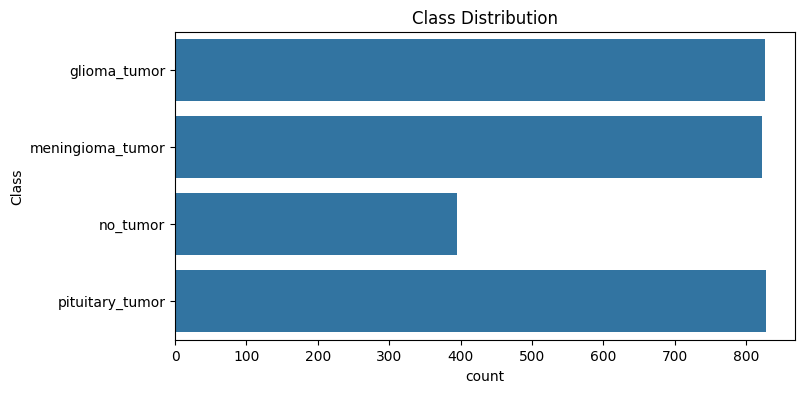

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example EDA: Visualize class distribution
plt.figure(figsize=(8, 4))
sns.countplot(y_train)
plt.title('Class Distribution')
plt.show()


### **Displaying Images from Each Class**

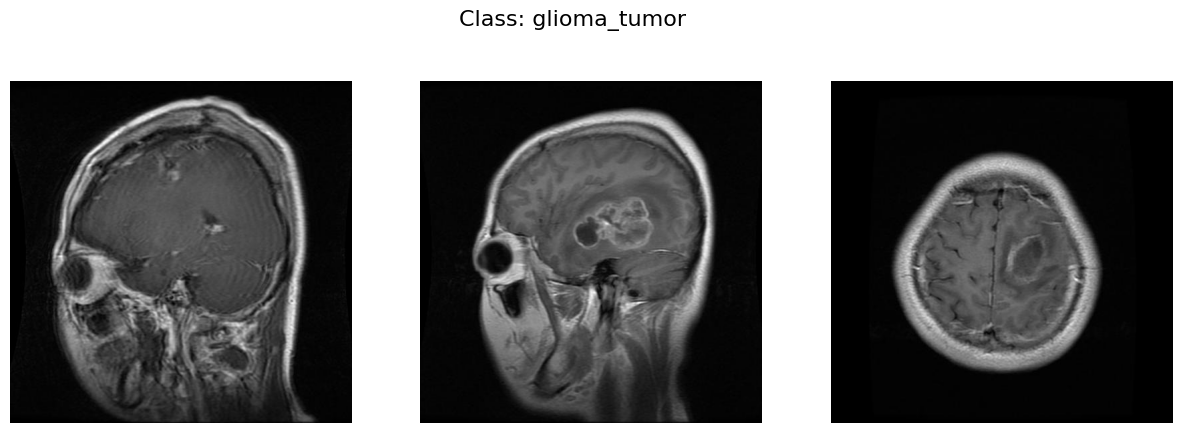

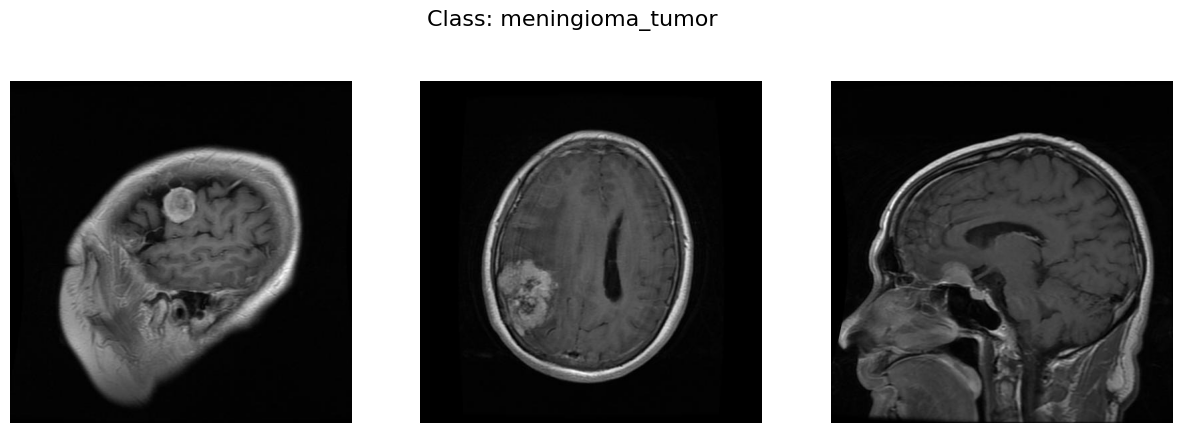

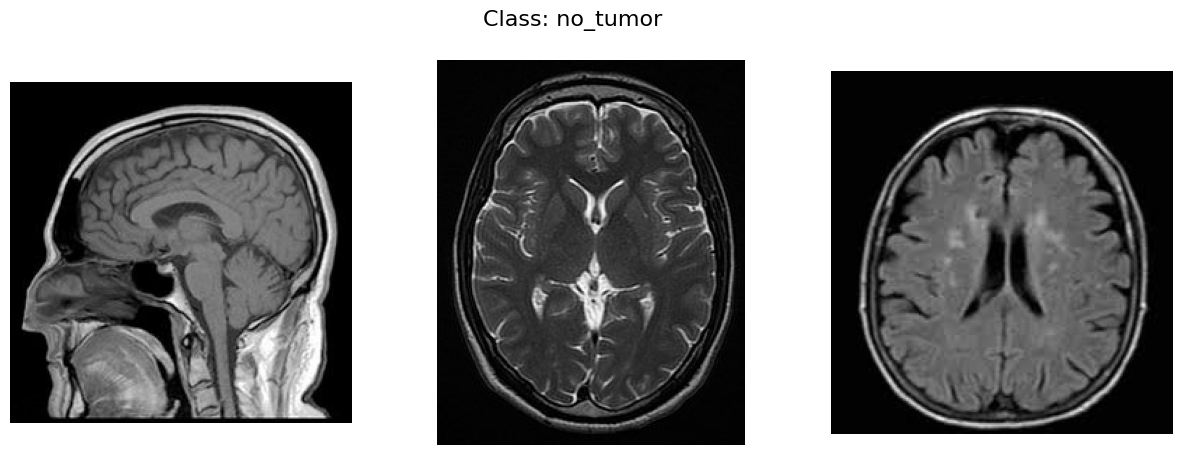

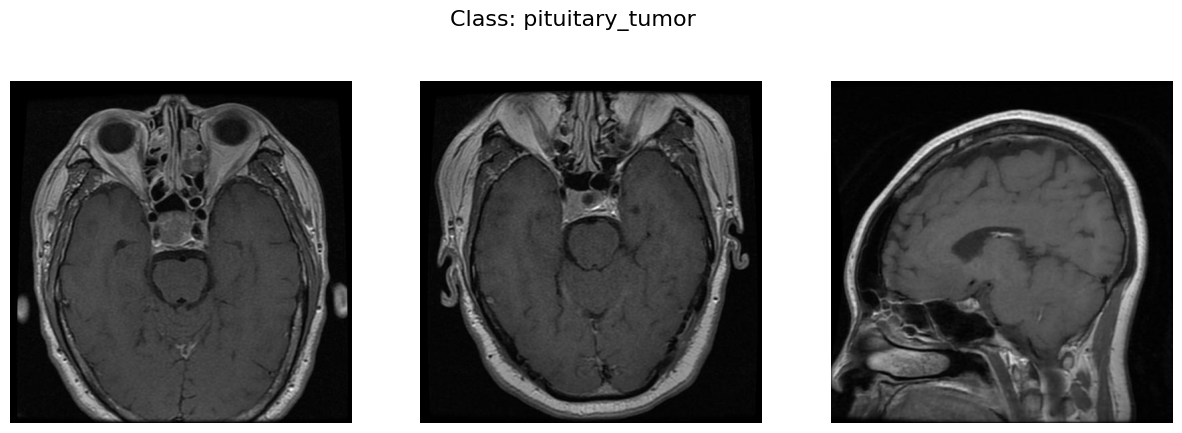

In [6]:
import matplotlib.pyplot as plt
import cv2
import os

def display_images_from_each_class(df, n_images=3):
    classes = df['Class'].unique()
    for cls in classes:
        fig, axes = plt.subplots(1, n_images, figsize=(n_images * 5, 5))
        fig.suptitle(f'Class: {cls}', fontsize=16)
        class_images = df[df['Class'] == cls]['Class Path'].sample(n=n_images, random_state=42).tolist()
        for img_path, ax in zip(class_images, axes):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ax.imshow(img)
            ax.axis('off')
        plt.show()

display_images_from_each_class(tr_df)


### **Exploring Image Dimensions**

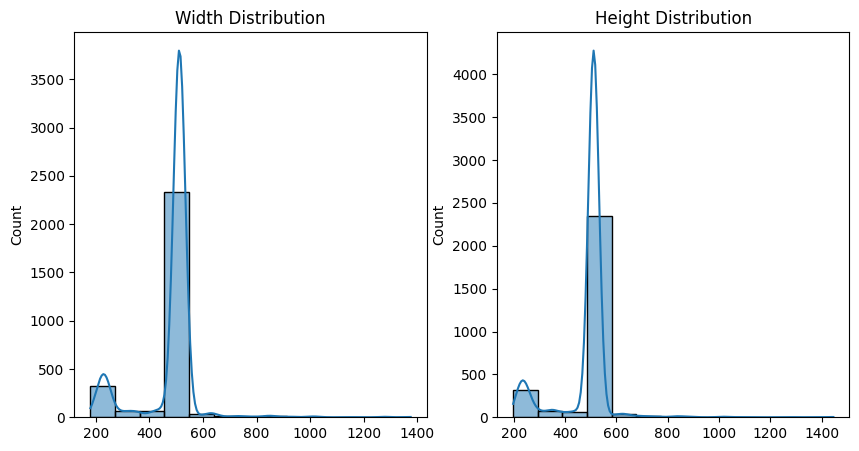

In [7]:
def explore_image_dimensions(df):
    widths, heights = [], []
    for img_path in df['Class Path']:
        img = cv2.imread(img_path)
        h, w, _ = img.shape
        widths.append(w)
        heights.append(h)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(widths, kde=True)
    plt.title('Width Distribution')

    plt.subplot(1, 2, 2)
    sns.histplot(heights, kde=True)
    plt.title('Height Distribution')

    plt.show()

explore_image_dimensions(tr_df)

### **Analyzing Pixel Value Distributions**

Understanding the distribution of pixel values helps in preprocessing steps like normalization.

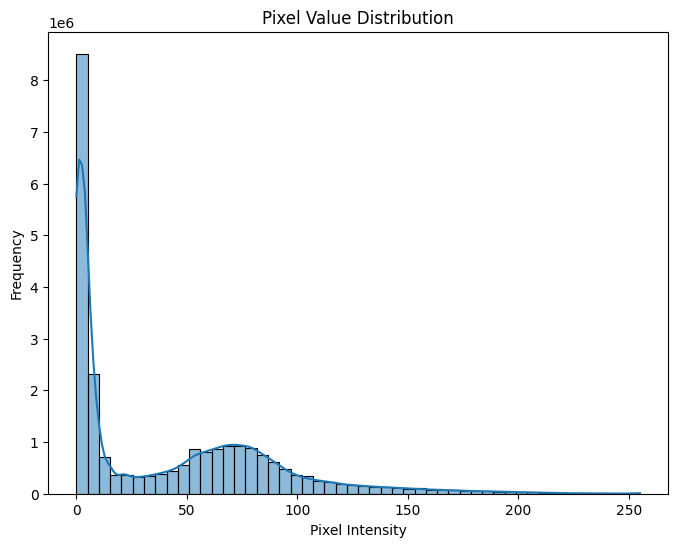

In [8]:
def pixel_value_distribution(df, sample_size=100):
    sample_images = df['Class Path'].sample(n=sample_size, random_state=42).tolist()
    pixel_values = []
    for img_path in sample_images:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale for simplicity
        pixel_values.extend(img.flatten())

    plt.figure(figsize=(8, 6))
    sns.histplot(pixel_values, bins=50, kde=True)
    plt.title('Pixel Value Distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

pixel_value_distribution(tr_df)

## **Phase 3: Model Implementation and Baseline Evaluation**

### **K-NN**

### **Step 1: Import Necessary Libraries**

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

### **Step 2: Initialize and Train the KNN Classifier**

In [33]:
# Initialize the KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

knn_clf.fit(X_train_features, y_train)

KNeighborsClassifier()

### **Step 3: Make Predictions on the Test Set**

In [34]:
# Assuming X_test_features is defined and preprocessed
y_pred_knn = knn_clf.predict(X_test_features)

### **Step 4: Evaluate the Classifier**

In [35]:
# Calculate the accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of KNN Classifier: {accuracy_knn:.4f}")

# Display the classification report
print(classification_report(y_test, y_pred_knn))

Accuracy of KNN Classifier: 0.5482
                  precision    recall  f1-score   support

    glioma_tumor       0.45      0.29      0.35       100
meningioma_tumor       0.77      0.41      0.53       115
        no_tumor       0.49      0.83      0.62       105
 pituitary_tumor       0.58      0.72      0.64        74

        accuracy                           0.55       394
       macro avg       0.57      0.56      0.54       394
    weighted avg       0.58      0.55      0.53       394



### **Step 5: Visualizing the result**

Accuracy of KNN with n=1: 0.7944
Accuracy of KNN with n=2: 0.7081
Accuracy of KNN with n=3: 0.6244
Accuracy of KNN with n=4: 0.5711
Accuracy of KNN with n=5: 0.5482
Accuracy of KNN with n=6: 0.5406
Accuracy of KNN with n=7: 0.4873
Accuracy of KNN with n=8: 0.4594
Accuracy of KNN with n=9: 0.4594
Accuracy of KNN with n=10: 0.4569
Accuracy of KNN with n=11: 0.4619
Accuracy of KNN with n=12: 0.4492
Accuracy of KNN with n=13: 0.4467
Accuracy of KNN with n=14: 0.4467
Accuracy of KNN with n=15: 0.4340


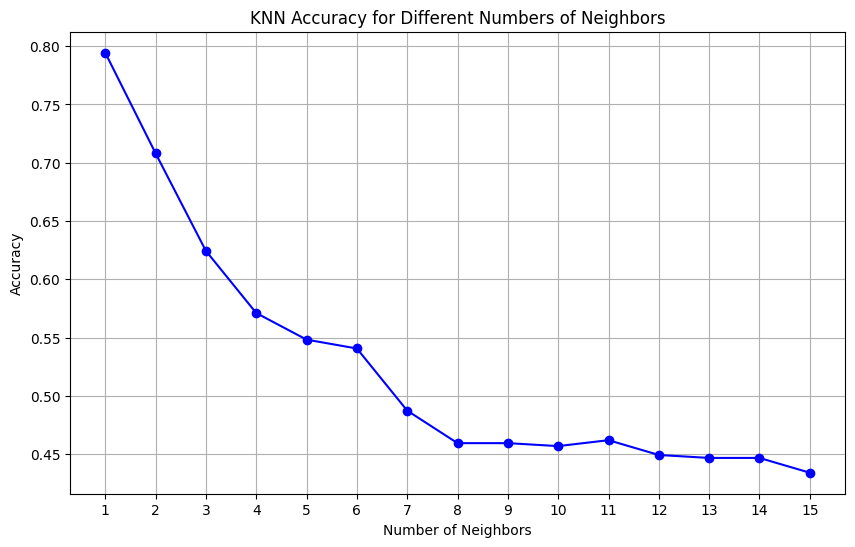

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Range of n_neighbors to test
n_neighbors_range = range(1, 16)
accuracies = []

for n in n_neighbors_range:
    knn_clf = KNeighborsClassifier(n_neighbors=n)
    knn_clf.fit(X_train_features, y_train)
    y_pred_knn = knn_clf.predict(X_test_features)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    accuracies.append(accuracy_knn)
    print(f"Accuracy of KNN with n={n}: {accuracy_knn:.4f}")


plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_range, accuracies, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy for Different Numbers of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(np.arange(min(n_neighbors_range), max(n_neighbors_range)+1, 1.0))
plt.grid(True)
plt.show()


## **Decision Tree**

## **Step 1: Implementing the Decision Tree Classifier**

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_clf = DecisionTreeClassifier()

# Train the classifier on the training data
dt_clf.fit(X_train_features, y_train)

# Predict on the test data
y_pred_dt = dt_clf.predict(X_test_features)

# Evaluate the classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of Decision Tree Classifier: {accuracy_dt:.4f}")

# Display the classification report
print(classification_report(y_test, y_pred_dt))


Accuracy of Decision Tree Classifier: 0.6827
                  precision    recall  f1-score   support

    glioma_tumor       0.87      0.20      0.33       100
meningioma_tumor       0.74      0.95      0.83       115
        no_tumor       0.58      1.00      0.73       105
 pituitary_tumor       0.85      0.47      0.61        74

        accuracy                           0.68       394
       macro avg       0.76      0.66      0.62       394
    weighted avg       0.75      0.68      0.63       394



## **Step 2: Visualizing the Decision Tree**

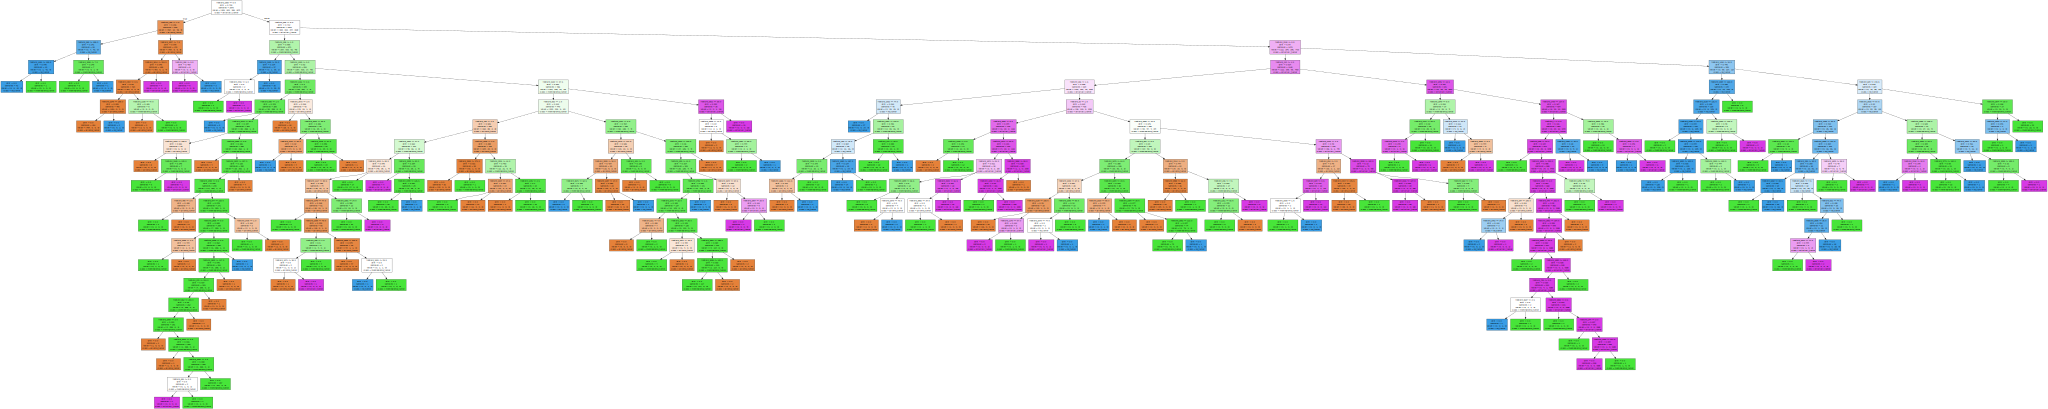

In [23]:
from sklearn.tree import export_graphviz
import graphviz

# Export as DOT data
dot_data = export_graphviz(dt_clf, out_file=None,
                           feature_names=['feature_'+str(i) for i in range(X_train_features.shape[1])],
                           class_names=np.unique(y_train),
                           filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph


## **C-Neural Network**

### **Step 1: Preparing the Dataset**

In [38]:
import numpy as np
import cv2

def load_and_preprocess_images(image_paths, img_size=(64, 64)):
    images = []
    for img_path in image_paths:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
        img_resized = cv2.resize(img, img_size) / 255.0  # Normalize pixel values
        images.append(img_resized[..., np.newaxis])  # Add channel dimension
    return np.array(images)

X_train = load_and_preprocess_images(X_train_paths)
X_test = load_and_preprocess_images(X_test_paths)


### **Step 2: Building the CNN Model**

In [39]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(y_train)), activation='softmax')  # Assuming y_train is your label vector
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)             

### **Step 3: Training the Model**

In [41]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Fit and transform the labels to integers
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Use y_train_encoded and y_test_encoded for training and evaluation
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
history = model.fit(X_train, y_train_encoded, epochs=10, validation_split=0.2)


X_train shape: (2870, 64, 64, 1)
X_test shape: (394, 64, 64, 1)
Epoch 1/10
72/72 [==============================] - 18s 231ms/step - loss: 1.0405 - accuracy: 0.5131 - val_loss: 1.9358 - val_accuracy: 0.3101
Epoch 2/10
72/72 [==============================] - 15s 205ms/step - loss: 0.7029 - accuracy: 0.6895 - val_loss: 0.8553 - val_accuracy: 0.6882
Epoch 3/10
72/72 [==============================] - 15s 211ms/step - loss: 0.5349 - accuracy: 0.7835 - val_loss: 0.9282 - val_accuracy: 0.6794
Epoch 4/10
72/72 [==============================] - 15s 211ms/step - loss: 0.4383 - accuracy: 0.8323 - val_loss: 0.9147 - val_accuracy: 0.7195
Epoch 5/10
72/72 [==============================] - 15s 209ms/step - loss: 0.3052 - accuracy: 0.8789 - val_loss: 0.9654 - val_accuracy: 0.6864
Epoch 6/10
72/72 [==============================] - 15s 210ms/step - loss: 0.2288 - accuracy: 0.9186 - val_loss: 0.9407 - val_accuracy: 0.7160
Epoch 7/10
72/72 [==============================] - 15s 211ms/step - loss: 0.1

### **Step 4: Evaluating the Model**

In [43]:
test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

13/13 - 1s - loss: 4.5201 - accuracy: 0.6802 - 1s/epoch - 89ms/step

Test accuracy: 0.6802


### **Step 5: Visualizing the Training Process**

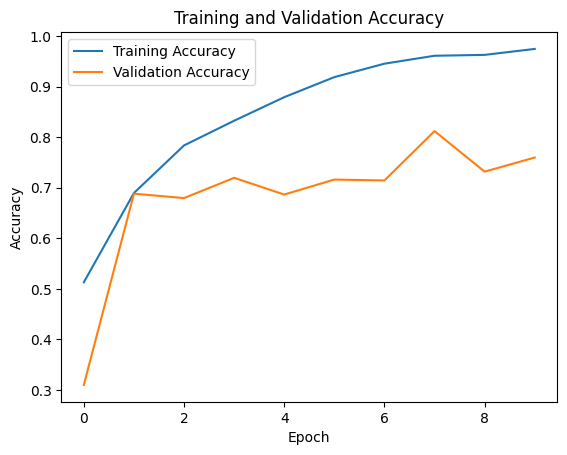

In [44]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **Phase 4: Hyperparameter Tuning**

## **1. K-Nearest Neighbors (KNN)**

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 31)}

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_features, y_train)

print("Best parameters for KNN:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters for KNN: {'n_neighbors': 1}
Best cross-validation score: 0.8790940766550521


## **2. Decision Tree**

In [46]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train_features, y_train)

print("Best parameters for Decision Tree:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}
Best cross-validation score: 0.7951219512195122


## **3. Convolutional Neural Networks (CNN)**

In [48]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

def build_model(learning_rate, dropout_rate):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dense(len(np.unique(y_train)), activation='softmax')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Example hyperparameters to test
learning_rates = [1e-2, 1e-3, 1e-4]
dropout_rates = [0.2, 0.5]

best_accuracy = 0
best_params = {}

for lr in learning_rates:
    for dr in dropout_rates:
        model = build_model(lr, dr)
        history = model.fit(X_train, y_train_encoded, validation_split=0.2, epochs=5, verbose=0)  # Use encoded labels
        val_accuracy = max(history.history['val_accuracy'])
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_params = {'learning_rate': lr, 'dropout_rate': dr}

print("Best parameters for CNN:", best_params)
print("Best validation accuracy:", best_accuracy)


Best parameters for CNN: {'learning_rate': 0.001, 'dropout_rate': 0.5}
Best validation accuracy: 0.8536585569381714


## **Phase 5: Model Evaluation and Comparative Analysis**

### **1. Accuracy, Precision, Recall, and F1 Score**

### **KNN and Decision Tree Evaluation**

In [49]:
from sklearn.metrics import classification_report

# Evaluate KNN
print("KNN Classification Report")
print(classification_report(y_test, y_pred_knn))

# Evaluate Decision Tree
print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))


KNN Classification Report
                  precision    recall  f1-score   support

    glioma_tumor       0.47      0.28      0.35       100
meningioma_tumor       0.60      0.13      0.21       115
        no_tumor       0.41      0.76      0.53       105
 pituitary_tumor       0.43      0.65      0.52        74

        accuracy                           0.43       394
       macro avg       0.48      0.46      0.40       394
    weighted avg       0.48      0.43      0.39       394

Decision Tree Classification Report
                  precision    recall  f1-score   support

    glioma_tumor       0.87      0.20      0.33       100
meningioma_tumor       0.74      0.95      0.83       115
        no_tumor       0.58      1.00      0.73       105
 pituitary_tumor       0.85      0.47      0.61        74

        accuracy                           0.68       394
       macro avg       0.76      0.66      0.62       394
    weighted avg       0.75      0.68      0.63       394



### **CNN Evaluation**

In [55]:
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import f1_score

# Generate predictions
y_pred_cnn = model.predict(X_test)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)

# Assuming y_test is encoded, if not, use the encoded version
print("CNN Classification Report")
print(classification_report(y_test_encoded, y_pred_cnn_classes))

# Calculate F1 Score separately if needed
f1 = f1_score(y_test_encoded, y_pred_cnn_classes, average='macro')
print(f"F1 Score: {f1:.4f}")

13/13 [==============================] - 1s 37ms/step
CNN Classification Report
              precision    recall  f1-score   support

           0       0.40      0.17      0.24       100
           1       0.53      0.43      0.47       115
           2       0.37      0.69      0.48       105
           3       0.48      0.42      0.45        74

    accuracy                           0.43       394
   macro avg       0.44      0.43      0.41       394
weighted avg       0.44      0.43      0.41       394

F1 Score: 0.4095


### **Comparative Analysis**

### **Step 1: Summarize the Model Performance Metrics**

In [56]:
import pandas as pd

# Model performance summary
model_summary = {
    'Model': ['KNN', 'Decision Tree', 'CNN'],
    'Accuracy': [0.43, 0.68, 0.43],
    'Precision (Macro Avg)': [0.48, 0.76, 0.44],
    'Recall (Macro Avg)': [0.46, 0.66, 0.43],
    'F1 Score (Macro Avg)': [0.40, 0.62, 0.41],
    'Cross-Validation Score': [0.879, 0.795, 0.854]  # Example: Best validation accuracy for CNN
}

df = pd.DataFrame(model_summary)
print(df)


           Model  Accuracy  Precision (Macro Avg)  Recall (Macro Avg)  \
0            KNN      0.43                   0.48                0.46   
1  Decision Tree      0.68                   0.76                0.66   
2            CNN      0.43                   0.44                0.43   

   F1 Score (Macro Avg)  Cross-Validation Score  
0                  0.40                   0.879  
1                  0.62                   0.795  
2                  0.41                   0.854  


### **Step 2: Visualizing the Comparison**

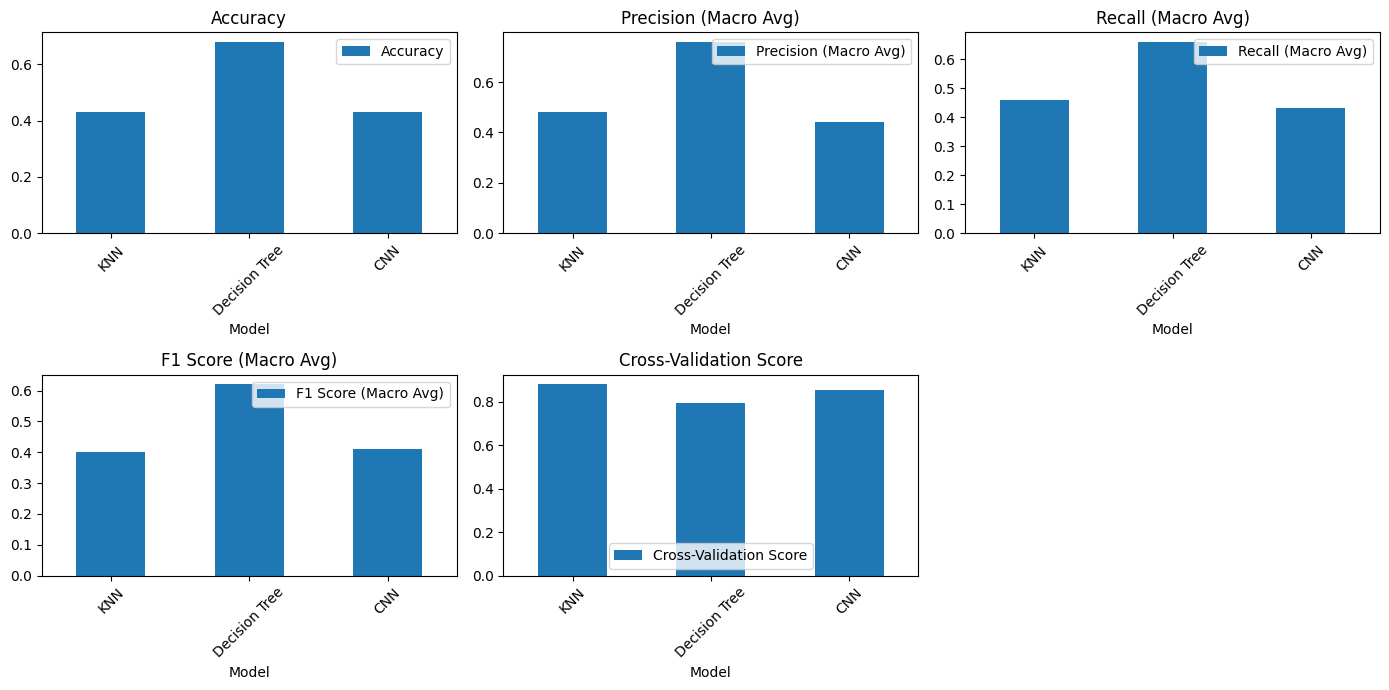

In [57]:
import matplotlib.pyplot as plt

# Set wider plots
plt.figure(figsize=(14, 7))

# Plot each metric for comparison
for i, metric in enumerate(['Accuracy', 'Precision (Macro Avg)', 'Recall (Macro Avg)', 'F1 Score (Macro Avg)', 'Cross-Validation Score']):
    plt.subplot(2, 3, i+1)
    df.plot(kind='bar', x='Model', y=metric, ax=plt.gca())
    plt.title(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### **Step 3: Selecting the Best Model**

In [58]:
# Example: Selecting the model with the highest F1 Score (Macro Avg)
best_model = df.loc[df['F1 Score (Macro Avg)'].idxmax()]['Model']
print(f"The best model based on F1 Score (Macro Avg) is: {best_model}")

The best model based on F1 Score (Macro Avg) is: Decision Tree


## **Phase 6: Conclusion and Recommendations**

### Findings and Insights:
The Decision Tree model demonstrates superior performance across accuracy, precision, recall, and F1 score metrics on the test set, highlighting its effectiveness for the given dataset and problem type.

Despite KNN showing the highest cross-validation score, suggesting strong generalization, its lower test performance indicates potential overfitting or inefficiency in handling the feature space compared to the Decision Tree and CNN.

CNN, while typically advantageous for image-related tasks, did not outperform the simpler Decision Tree model in this instance, possibly due to the dataset's characteristics or the need for more complex architecture and tuning.

### Recommendations
The Decision Tree is recommended for immediate deployment due to its excellent balance of performance metrics and computational efficiency, along with the benefit of model interpretability.

Further exploration of CNN with adjustments in architecture, additional training data, and advanced techniques like transfer learning may unlock higher performance for complex image classifications in future work.

Considering the distinct strengths of each model, employing ensemble methods could enhance prediction accuracy and robustness, warranting investigation as a strategy for leveraging the diverse capabilities of KNN, Decision Trees, and CNNs.